In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [4]:
#Importa a biblioteca do sqlite, cria a conexão e o ponteiro
import sqlite3
con = sqlite3.connect("D:\\01_Estudos\\programação\\Notebooks\\tentativa 1\\SQL\\Grupo A\\Tratamento de dados\\resultados\\indicadores.db")  ##OBS: se o BD não existir, ele é criado automaticamente
cur = con.cursor()

In [5]:

#----------------csv----------------
# df = pd.read_csv("region_df.csv")
# df2 = pd.read_csv("brazil_df.csv")
#------------------------------------

df = pd.read_sql("SELECT * FROM region_df", con)
df2 = pd.read_sql("SELECT * FROM brazil_df", con)
df.head()

,region,epidemiological_week,total_inhabitants,last_available_confirmed,last_available_deaths,new_week_cases,new_week_deaths,prevalence,mortality,lethality,incidence_cases,incidence_deaths,cases_growth_factor,deaths_growth_factor
0,centro-oeste,10,3.052546e+06,1,0,1,0,0.032760,0.000000,0.000000,0.032760,0.000000,0.000000,0.000000
1,centro-oeste,11,5.720491e+06,14,0,13,0,0.244734,0.000000,0.000000,0.227253,0.000000,0.009615,0.000000
2,centro-oeste,12,7.549016e+06,142,0,128,0,1.881040,0.000000,0.000000,1.695585,0.000000,0.094675,0.000000
3,centro-oeste,13,8.933878e+06,323,1,181,1,3.615451,0.011193,0.003096,2.025996,0.011193,0.133876,0.000000
4,centro-oeste,14,1.044595e+07,641,11,318,10,6.136351,0.105304,0.017161,3.044243,0.095731,0.235207,0.007396


In [6]:
# Lista de macro regiões
regions = ['Centro Oeste','Nordeste','Norte','Sudeste','Sul']
df['region'].replace(['norte', 'nordeste', 'sudeste', 'sul', 'centro-oeste'],['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro Oeste'],inplace=True)

In [93]:
# Obter os dados relevantes de cada macro_região e os armazená-los em uma lista de dataframes
def get_regions(macro_regiao, relevant_dataframe):
    output_df = []
    
    for i in range(len(macro_regiao)):
        output_df.append( relevant_dataframe[(relevant_dataframe['region']==macro_regiao[i])] )
        output_df[i].set_index('epidemiological_week', inplace=True)
    
    return output_df

In [161]:
# Encontrar o valor máximo de uma coluna numa lista de dataframes
def find_max(lista_de_dataframes,column):
    max_value = 0
    for i in range(0,len(lista_de_dataframes)):
        aux = lista_de_dataframes[i][column].max()
        if(aux>max_value):
            max_value = aux
    return max_value

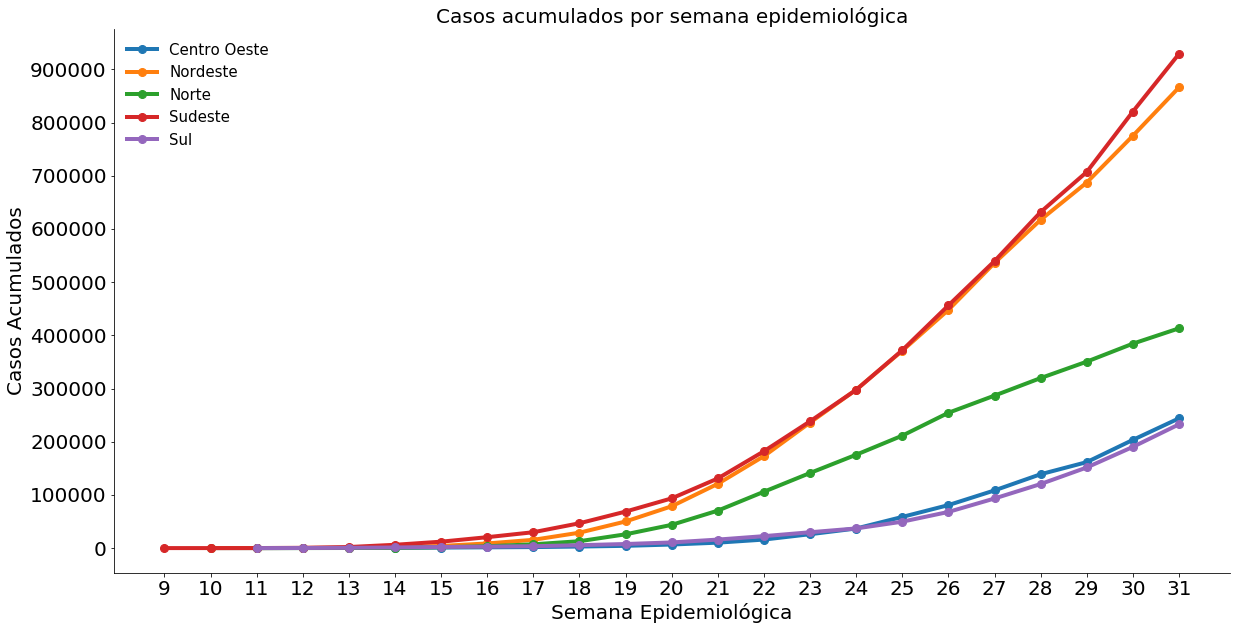

In [115]:
# -----------------------1------------------------------
# Casos acumulados até determinada semana epidemiológica
# ------------------------------------------------------
last_available_confirmed = df[['region','epidemiological_week','last_available_confirmed']].copy()
casos_acumulados = get_regions(regions, last_available_confirmed)

# Adicionando as "linhas" referentes a cada macro-região ao gráfico
for i in range(len(casos_acumulados)):
    casos_acumulados[i]['last_available_confirmed'].plot.line(figsize=(20,10), linewidth=4, fontsize=20, marker = 'o',markersize=8)

# Título do gráfico e rótulos dos eixo X e Y
plt.xlabel('Semana Epidemiológica', fontsize=20);
plt.ylabel('Casos Acumulados',fontsize=20);
plt.title('Casos acumulados por semana epidemiológica',fontsize=20);

# Adicionando a legenda no campo superior esquerdo
plt.legend(regions, loc='upper left', fontsize = 15, frameon=False)

# Colocando limites e intervalos do eixo X e Y
max_value = find_max(casos_acumulados,'last_available_confirmed')
plt.yticks(np.arange(0,max_value,100000))
plt.xticks(np.arange(9,32,1))

#Tirando bordas
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adicionando valores do eixo Y à direita do gráfico
#plt.tick_params(labelright=True,labelsize=20)

# Adicionando grid para facilitar visualização
#plt.grid(True)

# Salvando o gráfico em imagem
#plt.savefig("Gráficos/casos_acumulados.jpg")

# Mostre o plot e feche-o para uso posterior
plt.show()
plt.close()

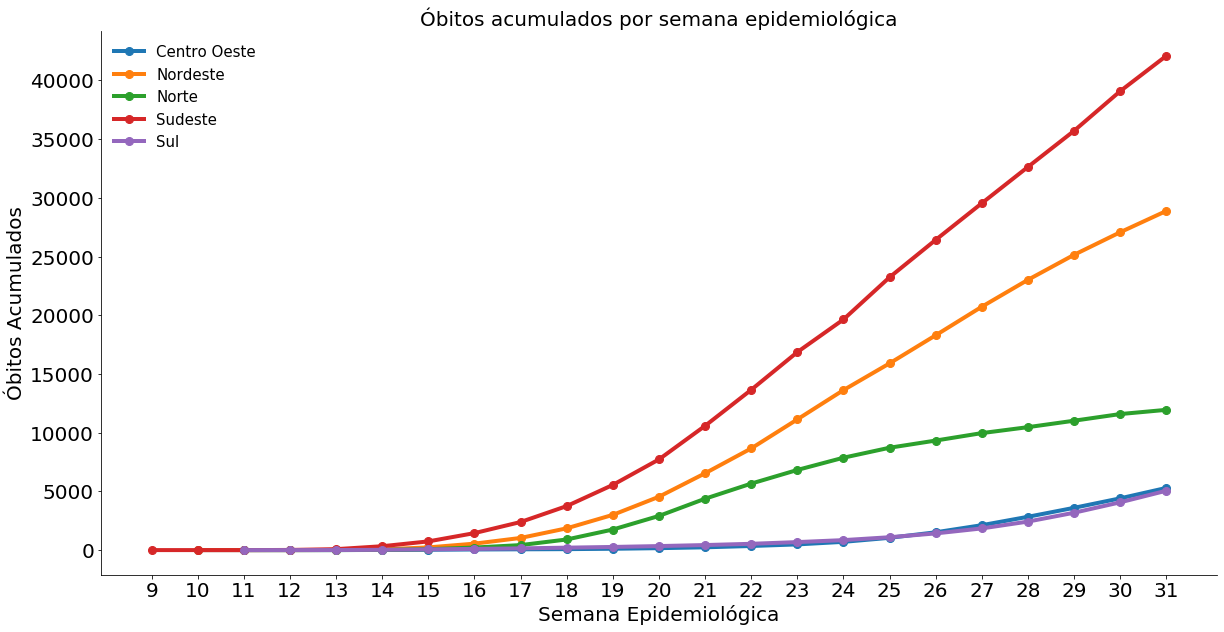

In [114]:
# ------------------------2------------------------------
# Óbitos acumulados até determinada semana epidemiológica
# -------------------------------------------------------
last_available_deaths = df[['region','epidemiological_week','last_available_deaths']].copy()
obitos_acumulados = get_regions(regions, last_available_deaths)

# Adicionando as "linhas" referentes a cada macro-região ao gráfico
for i in range(len(obitos_acumulados)):
    obitos_acumulados[i]['last_available_deaths'].plot.line(figsize=(20,10), linewidth=4, fontsize=20, marker = 'o',markersize=8)

# Título do gráfico e rótulos dos eixo X e Y
plt.xlabel('Semana Epidemiológica', fontsize=20);
plt.ylabel('Óbitos Acumulados',fontsize=20);
plt.title('Óbitos acumulados por semana epidemiológica',fontsize=20);

# Adicionando a legenda no campo superior esquerdo
plt.legend(regions, loc='upper left', fontsize = 15, frameon=False)

# Colocando limites e intervalos do eixo X e Y
max_value = find_max(obitos_acumulados,'last_available_deaths')
plt.yticks(np.arange(0,max_value,5000))
plt.xticks(np.arange(9,32,1))

#Tirando bordas
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adicionando valores do eixo Y à direita do gráfico
#plt.tick_params(labelright=True,labelsize=20)

# Adicionando grid para facilitar visualização
#plt.grid(True)

# Salvando o gráfico em imagem
#plt.savefig("Gráficos/obitos_acumulados.jpg")

# Mostre o plot e feche-o para uso posterior
plt.show()
plt.close()

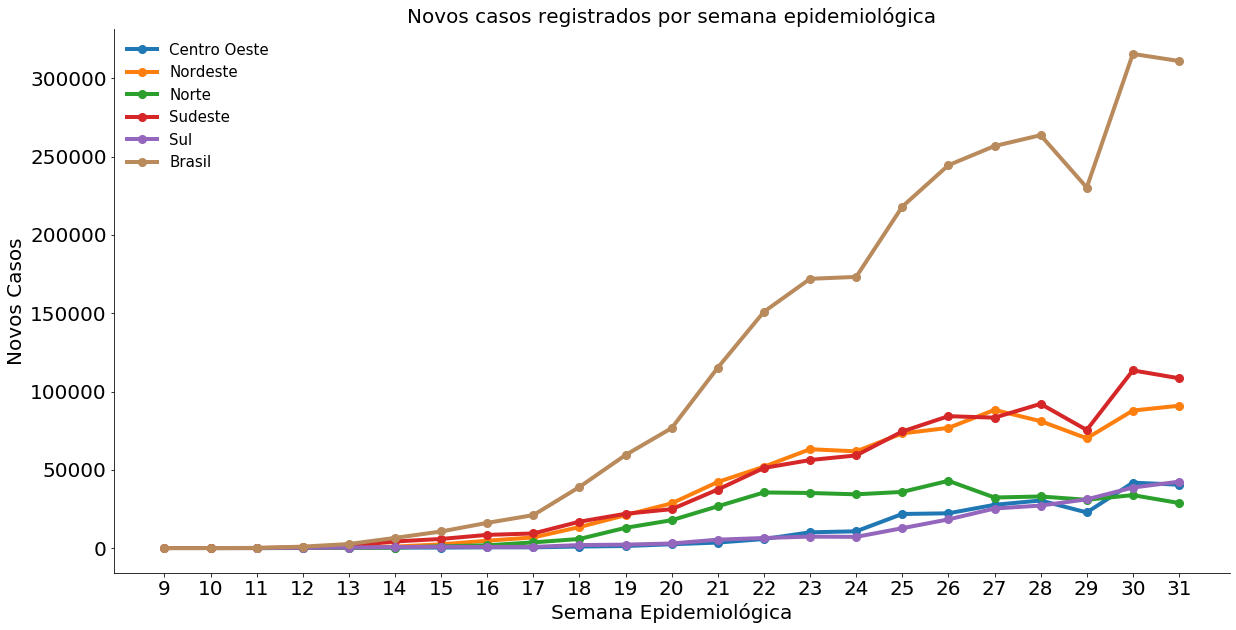

In [178]:
# -----------------3----------------------
# Novos casos em uma semana epidemiológica
# ----------------------------------------
new_week_cases = df[['region','epidemiological_week','new_week_cases']].copy()
novos_casos = get_regions(regions, new_week_cases)

# Adicionando as "linhas" referentes a cada macro-região ao gráfico
for i in range(len(novos_casos)):
    novos_casos[i]['new_week_cases'].plot.line(figsize=(20,10), linewidth=4, fontsize=20, marker = 'o',markersize=8)
# Adicionando as "linhas" referentes ao Brasil ao gráfico
df2.set_index('epidemiological_week')['new_week_cases'].plot.line(color = '#b88a5c',figsize=(20,10), linewidth=4, fontsize=20, marker = 'o',markersize=8)

# Título do gráfico e rótulos dos eixo X e Y
plt.xlabel('Semana Epidemiológica', fontsize=20);
plt.ylabel('Novos Casos',fontsize=20);
plt.title('Novos casos registrados por semana epidemiológica',fontsize=20);

# Adicionando a legenda no campo superior esquerdo
plt.legend(regions+['Brasil'], loc='upper left', fontsize = 15, frameon=False)

# Colocando limites e intervalos do eixo X e Y
max_value = find_max(novos_casos+[df2.set_index('epidemiological_week')],'new_week_cases')
plt.yticks(np.arange(0,max_value,50000))
plt.xticks(np.arange(9,32,1))

#Tirando bordas
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adicionando valores do eixo Y à direita do gráfico
#plt.tick_params(labelright=True,labelsize=20)

# Adicionando grid para facilitar visualização
#plt.grid(True)

# Salvando o gráfico em imagem
#plt.savefig("Gráficos/novos_casos.jpg")

# Mostre o plot e feche-o para uso posterior
plt.show()
plt.close()

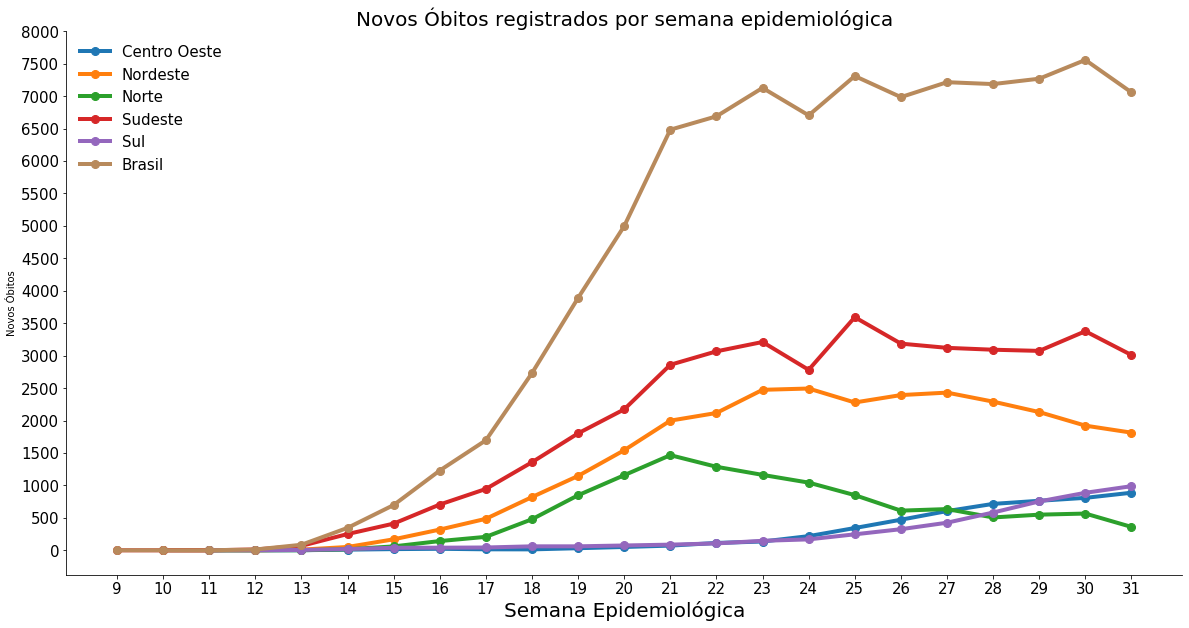

In [147]:
# ------------------4----------------------
# Novos óbitos em uma semana epidemiológica
# -----------------------------------------
new_week_deaths	 = df[['region','epidemiological_week','new_week_deaths']].copy()
novos_obitos = get_regions(regions, new_week_deaths)

# Adicionando as "linhas" referentes a cada macro-região ao gráfico
for i in range(len(novos_obitos)):
    novos_obitos[i]['new_week_deaths'].plot.line(figsize=(20,10), linewidth=4, fontsize=20, marker = 'o',markersize=8)
# Adicionando a "linha" referente ao Brasil ao gráfico
df2.set_index('epidemiological_week')['new_week_deaths'].plot.line(color = '#b88a5c',figsize=(20,10), linewidth=4, fontsize=15, marker = 'o',markersize=8)

# Título do gráfico e rótulos dos eixo X e Y
plt.xlabel('Semana Epidemiológica', fontsize=20);
plt.ylabel('Novos Óbitos',fontsize=10);
plt.title('Novos Óbitos registrados por semana epidemiológica',fontsize=20);

# Adicionando a legenda no campo superior esquerdo
plt.legend(regions+['Brasil'], loc='upper left', fontsize = 15, frameon=False)

# Colocando limites e intervalos do eixo X e Y
plt.yticks(np.arange(0,8001,500))
plt.xticks(np.arange(9,32,1))

#Tirando bordas
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adicionando valores do eixo Y à direita do gráfico
#plt.tick_params(labelright=True,labelsize=20)

# Adicionando grid para facilitar visualização
#plt.grid(True)

# Salvando o gráfico em imagem
#plt.savefig("Gráficos/novos_obitos.jpg")

# Mostre o plot e feche-o para uso posterior
plt.show()
plt.close()

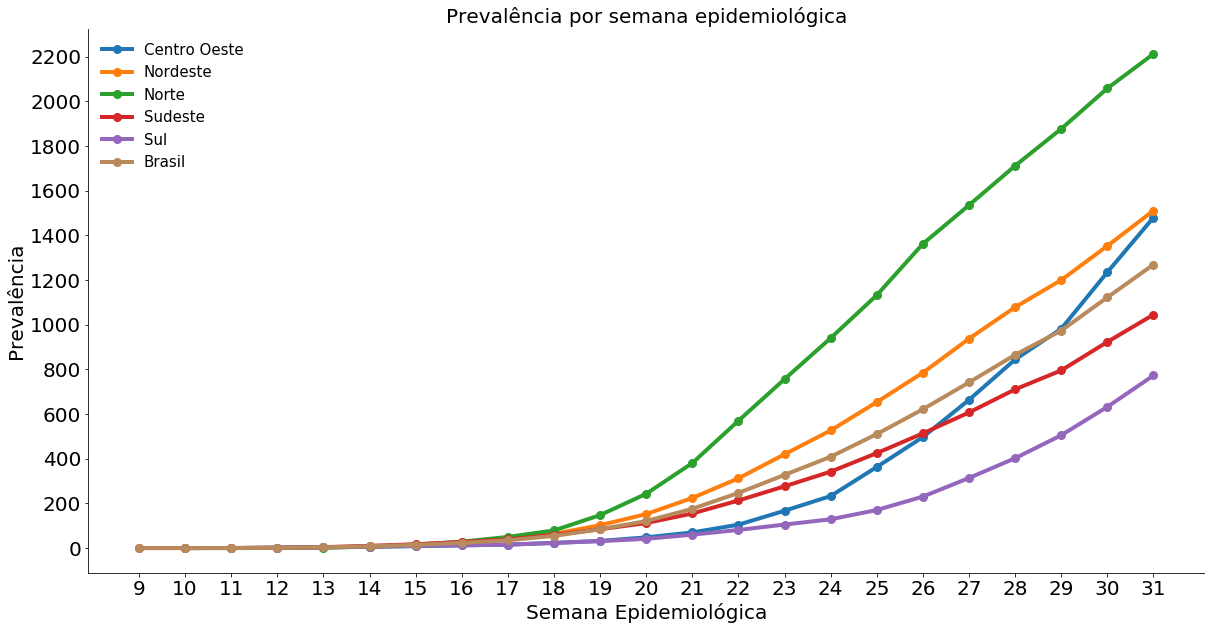

In [175]:
# ----5------
# Prevalência
# -----------
prevalence = df[['region','epidemiological_week','prevalence']].copy()
prevalencia = get_regions(regions, prevalence)

# Adicionando as "linhas" referentes a cada macro-região ao gráfico
for i in range(len(prevalencia)):
    prevalencia[i]['prevalence'].plot.line(figsize=(20,10), linewidth=4, fontsize=20, marker = 'o',markersize=8)
# Adicionando as "linhas" referentes ao Brasil ao gráfico
df2.set_index('epidemiological_week')['prevalence'].plot.line(color = '#b88a5c',figsize=(20,10), linewidth=4, fontsize=20, marker = 'o',markersize=8)

# Título do gráfico e rótulos dos eixo X e Y
plt.xlabel('Semana Epidemiológica', fontsize=20);
plt.ylabel('Prevalência',fontsize=20);
plt.title('Prevalência por semana epidemiológica',fontsize=20);

# Adicionando a legenda no campo superior esquerdo
plt.legend(regions+['Brasil'], loc='upper left', fontsize = 15, frameon=False)

# Colocando limites e intervalos do eixo X e Y
max_value = find_max(prevalencia+[df2.set_index('epidemiological_week')],'prevalence')
plt.yticks(np.arange(0,max_value,200))
plt.xticks(np.arange(9,32,1))

#Tirando bordas
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adicionando valores do eixo Y à direita do gráfico
#plt.tick_params(labelright=True,labelsize=20)

# Adicionando grid para facilitar visualização
#plt.grid(True)

# Salvando o gráfico em imagem
#plt.savefig("Gráficos/prevalencia.jpg")

# Mostre o plot e feche-o para uso posterior
plt.show()
plt.close()

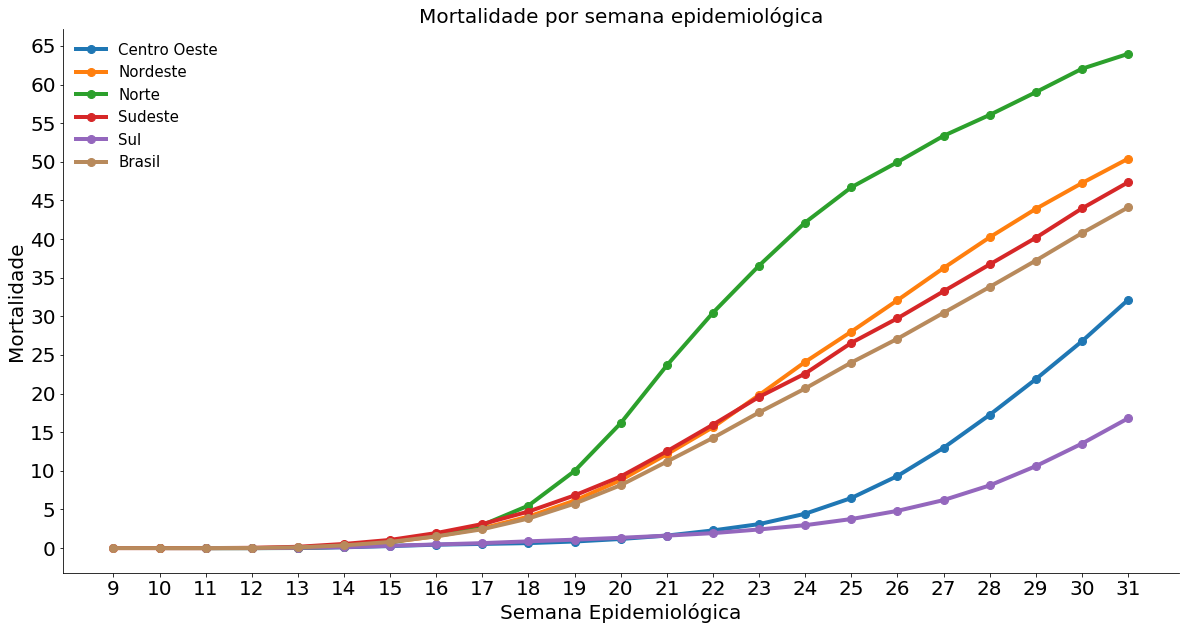

In [137]:
# ----6------
# Mortalidade
# -----------
mortality = df[['region','epidemiological_week','mortality']].copy()
mortalidade = get_regions(regions, mortality)

# Adicionando as "linhas" referentes a cada macro-região ao gráfico
for i in range(len(mortalidade)):
    mortalidade[i]['mortality'].plot.line(figsize=(20,10), linewidth=4, fontsize=20, marker = 'o',markersize=8)
# Adicionando as "linhas" referentes ao Brasil ao gráfico
df2.set_index('epidemiological_week')['mortality'].plot.line(color = '#b88a5c',figsize=(20,10), linewidth=4, fontsize=20, marker = 'o',markersize=8)

# Título do gráfico e rótulos dos eixo X e Y
plt.xlabel('Semana Epidemiológica', fontsize=20);
plt.ylabel('Mortalidade',fontsize=20);
plt.title('Mortalidade por semana epidemiológica',fontsize=20);

# Adicionando a legenda no campo superior esquerdo
plt.legend(regions+['Brasil'], loc='upper left', fontsize = 15, frameon=False)

# Colocando limites e intervalos do eixo X e Y
plt.yticks(np.arange(0,70,5))
plt.xticks(np.arange(9,32,1))

#Tirando bordas
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adicionando valores do eixo Y à direita do gráfico
#plt.tick_params(labelright=True,labelsize=20)

# Adicionando grid para facilitar visualização
#plt.grid(True)

# Salvando o gráfico em imagem
#plt.savefig("Gráficos/mortalidade.jpg")

# Mostre o plot e feche-o para uso posterior
plt.show()
plt.close()


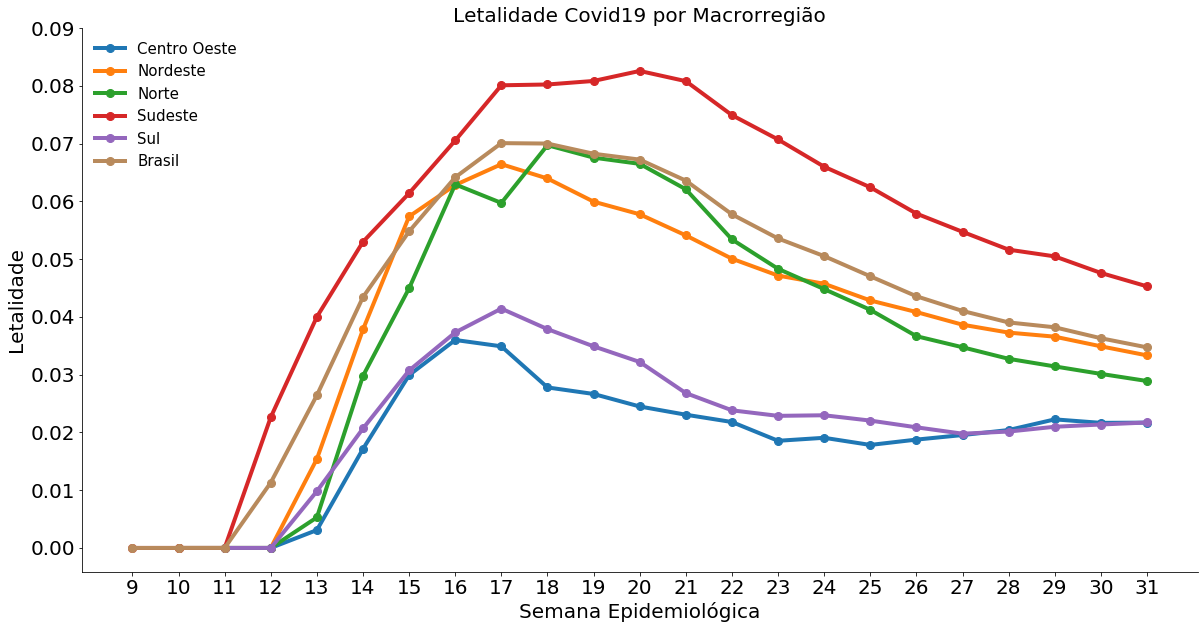

In [130]:
# ----7-----
# Letalidade
# ----------
lethality = df[['region','epidemiological_week','lethality']].copy()
letalidade = get_regions(regions, lethality)

# Adicionando as "linhas" referentes a cada macro-região ao gráfico
for i in range(len(letalidade)):
    letalidade[i]['lethality'].plot.line(figsize=(20,10), linewidth=4, fontsize=20, marker = 'o',markersize=8)
# Adicionando as "linhas" referentes ao Brasil ao gráfico
df2.set_index('epidemiological_week')['lethality'].plot.line(color = '#b88a5c',figsize=(20,10), linewidth=4, fontsize=20, marker = 'o',markersize=8)
# Título do gráfico e rótulos dos eixo X e Y
plt.xlabel('Semana Epidemiológica', fontsize=20);
plt.ylabel('Letalidade',fontsize=20);
plt.title('Letalidade Covid19 por Macrorregião',fontsize=20);

# Adicionando a legenda no campo superior esquerdo
plt.legend(regions+['Brasil'], loc='upper left', fontsize = 15, frameon=False)

# Colocando limites e intervalos do eixo X e Y
plt.yticks(np.arange(0,0.1,0.01))
plt.xticks(np.arange(9,32,1))

#Tirando bordas
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adicionando valores do eixo Y à direita do gráfico
#plt.tick_params(labelright=True,labelsize=20)

# Adicionando grid para facilitar visualização
#plt.grid(True)

# Salvando o gráfico em imagem
#plt.savefig("Gráficos/letalidade.jpg")

# Mostre o plot e feche-o para uso posterior
plt.show()
plt.close()


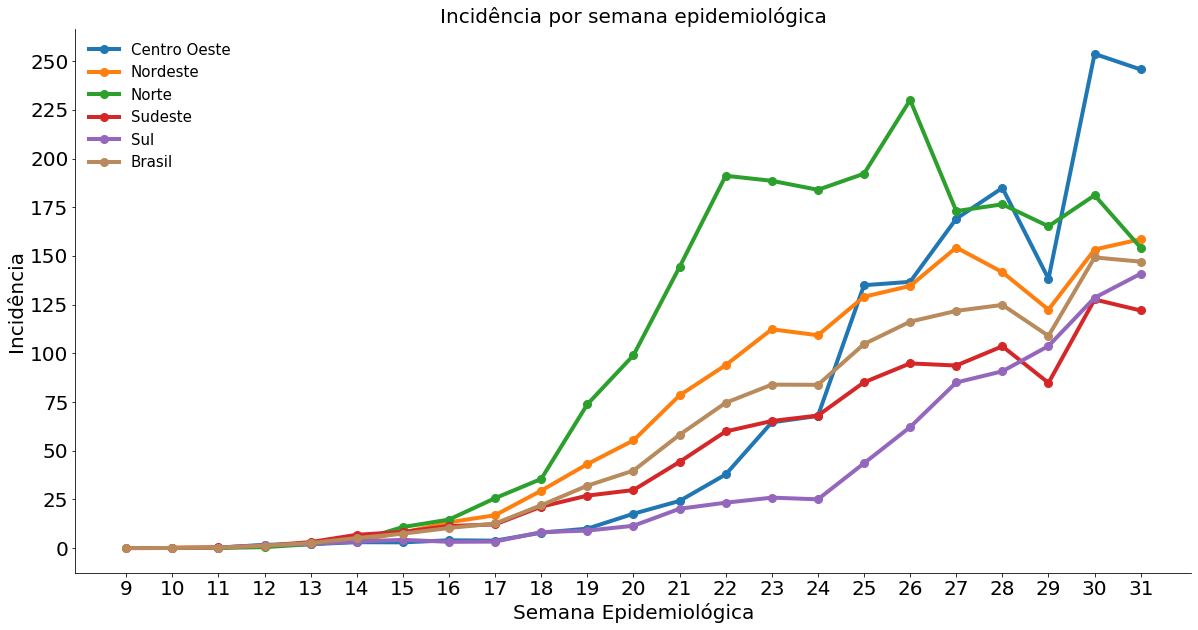

In [205]:
# --------------------8----------------------------
# Incidência (Novos casos a cada 100mil habitantes)
# -------------------------------------------------
incidence_cases = df[['region','epidemiological_week','incidence_cases']].copy()
incidencia = get_regions(regions, incidence_cases)

# Adicionando as "linhas" referentes a cada macro-região ao gráfico
for i in range(len(incidencia)):
    incidencia[i]['incidence_cases'].plot.line(figsize=(20,10), linewidth=4, fontsize=20, marker = 'o',markersize=8)
# Adicionando as "linhas" referentes ao Brasil ao gráfico
df2.set_index('epidemiological_week')['incidence_cases'].plot.line(color = '#b88a5c',figsize=(20,10), linewidth=4, fontsize=20, marker = 'o',markersize=8)

# Título do gráfico e rótulos dos eixo X e Y
plt.xlabel('Semana Epidemiológica', fontsize=20);
plt.ylabel('Incidência',fontsize=20);
plt.title('Incidência por semana epidemiológica',fontsize=20);

# Adicionando a legenda no campo superior esquerdo
plt.legend(regions+['Brasil'], loc='upper left', fontsize = 15, frameon=False)

# Colocando limites e intervalos do eixo X e Y
plt.xticks(np.arange(9,32,1))
plt.yticks(np.arange(0,251,25))


#Tirando bordas
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adicionando valores do eixo Y à direita do gráfico
#plt.tick_params(labelright=True,labelsize=20)

# Adicionando grid para facilitar visualização
#plt.grid(True)

# Salvando o gráfico em imagem
#plt.savefig("Gráficos/incidencia.jpg")

# Mostre o plot e feche-o para uso posterior
plt.show()
plt.close()

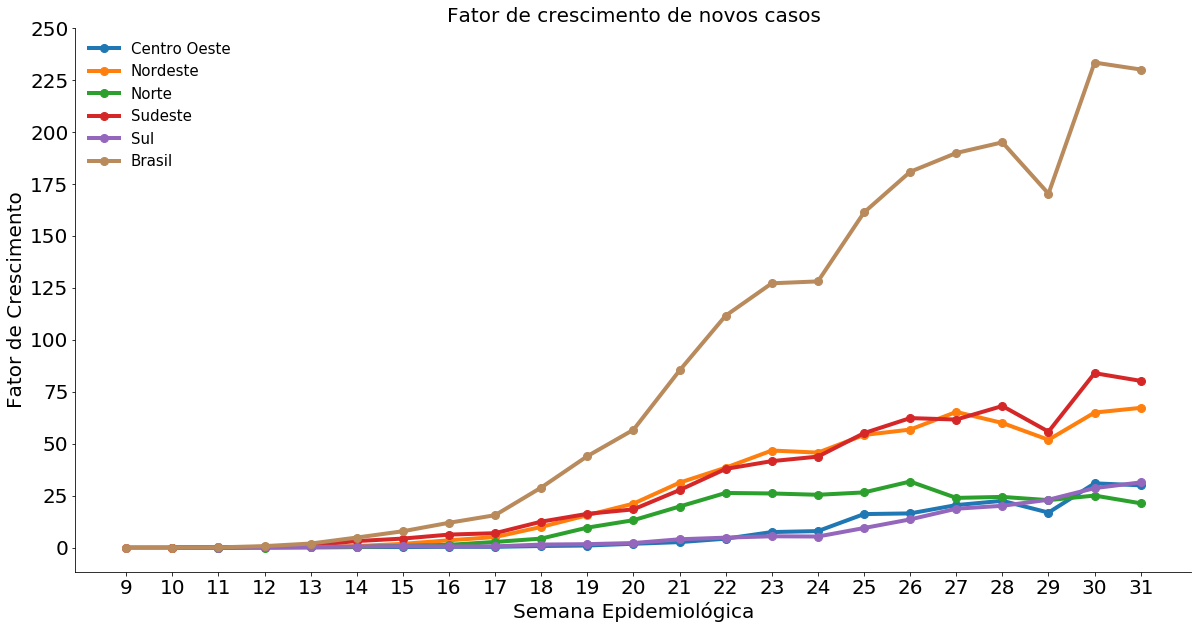

In [202]:
# -------------------------------------------9---------------------------------------------------
# Fator de Crescimento (Do número de novos casos entre duas semanas epidemiológicas consecutivas)
# -----------------------------------------------------------------------------------------------
cases_growth_factor = df[['region','epidemiological_week','cases_growth_factor']].copy()
fator_de_crescimento = get_regions(regions, cases_growth_factor)

# Adicionando as "linhas" referentes a cada macro-região ao gráfico
for i in range(len(fator_de_crescimento)):
    fator_de_crescimento[i]['cases_growth_factor'].plot.line(figsize=(20,10), linewidth=4, fontsize=20, marker = 'o',markersize=8)
# Adicionando as "linhas" referentes ao Brasil ao gráfico
df2.set_index('epidemiological_week')['cases_growth_factor'].plot.line(color = '#b88a5c',figsize=(20,10), linewidth=4, fontsize=20, marker = 'o',markersize=8)

# Título do gráfico e rótulos dos eixo X e Y
plt.xlabel('Semana Epidemiológica', fontsize=20);
plt.ylabel('Fator de Crescimento',fontsize=20);
plt.title('Fator de crescimento de novos casos',fontsize=20);

# Adicionando a legenda no campo superior esquerdo
plt.legend(regions+['Brasil'], loc='upper left', fontsize = 15, frameon=False)

# Colocando limites e intervalos do eixo X e Y
plt.yticks(np.arange(0,251,25))
plt.xticks(np.arange(9,32,1))

#Tirando bordas
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


# Adicionando valores do eixo Y à direita do gráfico
#plt.tick_params(labelleft = False,labelright=True,labelsize=20)

# Adicionando grid para facilitar visualização
#plt.grid(True)

# Salvando o gráfico em imagem
#plt.savefig("Gráficos/fator_de_crescimento.jpg")

# Mostre o plot e feche-o para uso posterior
plt.show()
plt.close()